## 感知机 (Perceptron)
感知机是一个线性二分类模型，该模型的目标是找到能将训练数据正确划分成两类的分离超平面。   
感知机是神经网络和SVM的基础。  

### 1.模型定义
假设输入数据的特征向量为 $x \in R^{n}$，输出为$y=\{+1, -1\}$，则感知机模型由如下函数定义：$$f(x)=sign(w\cdot x+b)$$
sign为符号函数，即$$ sign(x)=\left\{
\begin{aligned}
+1, \ x\geq 0 \\
-1, \ x<0 \\
\end{aligned}
\right.
$$
其中，$w\in R^{n}$为模型的权重参数，$b \in R$为模型的偏置参数。  
在训练数据是线性可分的情况下，即存在某个超平面$w\cdot x+b$，对于所以得正样本($y=1$)有$w\cdot x+b>0$，对于所以得负样本($y=-1$)有$w\cdot x+b<0$，
感知机学习的目的就是找到这个能正确划分训练数据的超平面，而这个超平面是由w和b决定的，所以也就等同于找到正确的参数w和b。

### 2.损失函数
很容易想到用误分类样本的总数作为感知机的损失函数，但是存在的问题是，这样的损失函数对于参数w和b来说不是连续可导的，不易于优化。为此，感知机最终采用的损失函数是误分类样本到超平面的总距离，这个损失函数是连续可导函数。下面来一起看看这个损失函数的定义。 
  
先回忆下初中的数学知识，对于n维空间$R^{n}$中的任意一点$x_{0}$，到某平面S的距离为：$${|w\cdot x_{0}+b|}\over {||w||} $$
其中$||w||$是w的L2范数，即$||w||=\sqrt[]{\sum^{i=1}_{n}{w_{i}^2}}$ 。
  
对于某个误分类的正样本，有$y_{i}=+1$，$-y_{i}(w\cdot x_{i}+b)<0$；对于某个误分类的负样本，有$y_{i}=-1$，$-y_{i}(w\cdot x_{i}+b)>0$，  
因此，对于误分类的样本来说，总有$-y_{i}(w\cdot x_{i}+b)>0$，故误分类样本到超平面的距离可以写为：$$-\frac{y_{i}(w\cdot x_{i}+b)}{||w||} $$  
综上，假设被误分类的样本集合为M，所有误分类样本到超平面的距离之和为：$$-\frac{\sum_{x_{i}\in M} y_{i}(w\cdot x_{i}+b)}{||w||} $$
这个公式有个特点，就是当w和b以某个倍数缩放时，分子和分母会缩放相同的倍数，可以约掉，所以最终的损失函数可以只考虑分子，即$$L(w,b)=-\sum_{x_{i}\in M} y_{i}(w\cdot x_{i}+b)$$
这就是感知机模型的损失函数，该函数是w,b的连续可导函数。损失函数越小，则误分类点就离超平面越近，当损失函数为0时，则表明样本全部分类正确。感知机模型的目的就是找到使损失函数最小时的参数w和b。

### 3.算法流程
从上面可以知道，感知机学习问题实际上就是损失函数极小化问题：$min_{w,b}L(w,b)$，要求使得损失函数最小的w和b，我们先随机初始化w和b，然后采用**随机梯度下降(SGD)** 来优化求解。
> **随机梯度下降**：与批量梯度下降一次使用所有样本来更新参数不同，随机梯度下降一次只随机选取一个样本来更新参数。

损失函数$L(w,b)$关于w、b的梯度分布为：$$\frac{dL}{w} = -\sum_{x_{i}\in M}y_{i}x_{i}$$ $$\frac{dL}{b} = -\sum_{x_{i}\in M}y_{i}$$
随机选取一个误分类样本$(x_{i},y_{i})$，对w和b进行更新：$$w:=w+αy_{i}x_{i}$$ $$b:=b+αy_{i}$$
其中$α\in(0,1]$是学习率(learning rate)  
  
综上，感知机算法求解步骤如下：  
>模型函数$f(x)=sign(w\cdot x+b)$，求解w,b
1. 随机初始化w,b
2. 在训练集中选取某个样本$(x_{i},y_{i})$
3. 如果$y_{i}(w\cdot x_{i}+b)\leq 0$，则更新参数：  
$w:=w+αy_{i}x_{i}$  
$b:=b+αy_{i}$
4. 继续执行第2步，直到没有误分类的样本

感知机算法的直观解释：  
当有一个样本被误分类时，即该样本位于分离超平面错误的一侧，则调整w和b的值，使超平面向误分类样本的一侧移动，直到超平面越过该误分类样本使其被正确分类。并且有定理已经证明，在训练集线性可分的情况下，该算法是可以收敛的，即经过有限次迭代后可以找到一个能够完全正确划分所有数据的超平面。(该定理叫做**Novikoff定理**，有兴趣的同学可以自己去搜索推导过程)

### 4.Code
说了这么多概念和理论，终于到了愉快的敲代码环节啦 :-）  
代码中使用Iris数据集，该数据集中每个样本有4个特征，共分为三类。为了方便可视化，训练时只使用了前两个特征和前两个类别。
#### 4.1 手动造轮子

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载Iris数据集
iris = load_iris()
X = iris.data[:, :2]  # 只取前两个特征
Y = iris.target

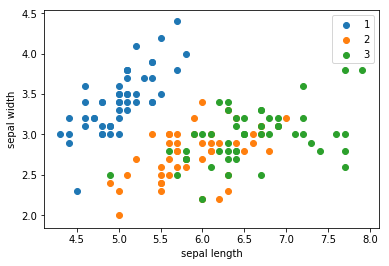

In [3]:
# 可视化
plt.scatter(X[:50][:,0], X[:50][:,1], label='1')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], label='2')
plt.scatter(X[100:][:, 0], X[100:][:, 1], label='3')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

从图中可以看出，第1类数据与另外两类都是线性可分的，而第2类数据与第3类数据线性不可分，所以在后面训练中将只取第1类数据和第2类数据。

In [4]:
# 取前两类数据作为训练集
X = X[:100]
Y = Y[:100]

# 将类0 -> -1
Y = np.where(Y, 1, -1) 

print('X shape：{}'.format(X.shape))
print('Y shape：{}'.format(Y.shape))

X shape：(100, 2)
Y shape：(100,)


In [6]:
class PLA(object):
    def __init__(self, lr=0.01, max_iter=1000, shuffle=True, log=True, log_step=50):
        self.max_iter = max_iter
        self.lr = lr
        self.shuffle = shuffle
        self.log = log
        self.log_step = log_step
        self.w = None
        self.b = 0
    
    def sign(self, x):
        return 1 if x >= 0 else -1
    
    def fit(self, X, Y):
        # 样本数量
        m = X.shape[0]
        # 初始化w
        self.w = np.random.randn(X.shape[1])
        # 打乱顺序
        if self.shuffle:
            idx = list(range(m))
            np.random.shuffle(idx)
            X = X[idx]
            Y = Y[idx]
        
        iter_count = 0
        while iter_count < self.max_iter:
            wrong_samples = []  # 用来存放误分类样本的Loss
            for i in range(m):
                x = X[i]
                y = Y[i]
                tmp = y * np.add(np.dot(self.w, x), self.b)  # y * (wx + b)
                if tmp <= 0:
                    # 更新w,b
                    self.w += self.lr * y * x
                    self.b += self.lr * y
                    wrong_samples.append(-tmp)
            
            if self.log:
                # 每迭代50次打印一次训练日志
                if iter_count % self.log_step == 0 and wrong_samples:
                    loss = np.sum(wrong_samples)
                    print('iter_count: {}\tloss: {:.4f}'.format(iter_count, loss))
                # 打印最后一条日志（loss=0）
                if not wrong_samples:
                    print('iter_count: {}\tloss: 0.0'.format(iter_count))
            # 如果wrong_samples为空，则说明所有样本都被正确分类，训练结束
            if not wrong_samples:
                break
            iter_count += 1
            
    def predict(self, x):
        value = np.dot(self.w, x) + self.b
        pred = self.sign(value)
        return pred

In [7]:
# 训练
pla = PLA()
pla.fit(X, Y)

iter_count: 0	loss: 82.4235
iter_count: 50	loss: 0.5479
iter_count: 100	loss: 0.2172
iter_count: 150	loss: 0.3217
iter_count: 200	loss: 0.2928
iter_count: 250	loss: 0.2704
iter_count: 300	loss: 0.2514
iter_count: 350	loss: 0.2365
iter_count: 400	loss: 0.2073
iter_count: 450	loss: 0.0427
iter_count: 500	loss: 0.0978
iter_count: 550	loss: 0.2019
iter_count: 600	loss: 0.2630
iter_count: 650	loss: 0.3330
iter_count: 659	loss: 0.0


In [8]:
# 模型学到的w和b
print('w: {}'.format(pla.w))
print('b: {}'.format(pla.b))

w: [ 0.76658275 -0.97928129]
b: -1.2000000000000008


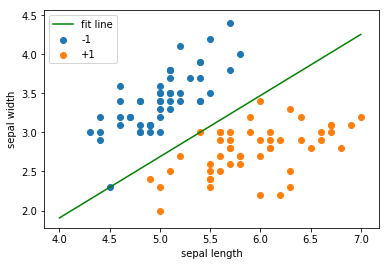

In [9]:
x0s = np.array([4.0, 7.0])
x1s = -(pla.w[0] * x0s + pla.b) / pla.w[1]
plt.plot(x0s, x1s, label='fit line', color='green')

plt.scatter(X[:50][:,0], X[:50][:,1], label='-1')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], label='+1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [10]:
# 预测
test_pos_data = np.array([7.0, 3.5])  # 随机生成一个正样本
test_neg_data = np.array([4.2, 2.5])  # 随机生成一个负样本
print(pla.predict(test_pos_data))
print(pla.predict(test_neg_data))

1
-1


#### 4.2 sklearn版

In [11]:
from sklearn.linear_model import Perceptron

In [12]:
# 训练
pla = Perceptron(alpha=0.01, max_iter=1000)
pla.fit(X, Y)

Perceptron(alpha=0.01, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [13]:
# 模型学到的w和b
ws = pla.coef_[0]
b = pla.intercept_[0]
print('w: {}'.format(ws))
print('b: {}'.format(b))

w: [ 67.2 -85.6]
b: -106.0


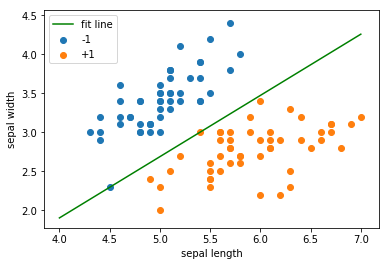

In [14]:
x0s = np.array([4.0, 7.0])
x1s = -(ws[0] * x0s + b) / ws[1]
plt.plot(x0s, x1s, label='fit line', color='green')

plt.scatter(X[:50][:,0], X[:50][:,1], label='-1')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], label='+1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [15]:
# 预测
test_pos_data = np.array([7.0, 3.5])  # 随机生成一个正样本
test_neg_data = np.array([4.2, 2.5])  # 随机生成一个负样本
print(pla.predict(test_pos_data.reshape(1, -1)))
print(pla.predict(test_neg_data.reshape(1, -1)))

[1]
[-1]


#### 4.3 tensorflow版

In [16]:
import tensorflow as tf

In [17]:
# Parameters
lr = 0.01
max_epochs = 1000
log_step = 50

# tf计算图的输入
X_input = tf.placeholder(tf.float32, shape=(None, 2), name='X')
Y_input = tf.placeholder(tf.float32, shape=(None, 1), name='Y')

# 初始化参数
W = tf.Variable(tf.random_normal([2, 1]), dtype=tf.float32, name='weight')
b = tf.Variable(0.0, dtype=tf.float32, name='bias')

# y * (wx + b)
pred = tf.squeeze(tf.multiply(Y_input, tf.matmul(X_input, W) + b))

# loss
loss = -tf.reduce_sum(pred)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [18]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 训练
for epoch in range(max_epochs):
    wrong_samples = []  # 用来存放误分类样本loss
    for x, y in zip(X, Y):
        feed_dict = {X_input: x.reshape(-1, 2), Y_input: y.reshape(-1, 1)}
        loss = sess.run(pred, feed_dict=feed_dict)
        if loss < 0:
            sess.run(optimizer, feed_dict=feed_dict)
            wrong_samples.append(loss)

    if not wrong_samples:
        print('epoch: {}\tloss: 0.0'.format(epoch))
        break

    if epoch % log_step == 0:
        total_loss = sess.run(-tf.reduce_sum(wrong_samples))
        print('epoch: {}\tloss: {:.4f}'.format(epoch, total_loss))

epoch: 0	loss: 94.8636
epoch: 50	loss: 0.1379
epoch: 100	loss: 0.1136
epoch: 150	loss: 0.1061
epoch: 200	loss: 0.1217
epoch: 250	loss: 0.2048
epoch: 300	loss: 0.3204
epoch: 350	loss: 0.3095
epoch: 400	loss: 0.0475
epoch: 450	loss: 0.2958
epoch: 500	loss: 0.2962
epoch: 550	loss: 0.2802
epoch: 600	loss: 0.1206
epoch: 608	loss: 0.0


In [19]:
ws = np.squeeze(sess.run(W))
b = sess.run(b)
print('ws: {}'.format(ws))
print('b: {}'.format(b))

ws: [ 0.78385425 -1.003325  ]
b: -1.2199991941452026


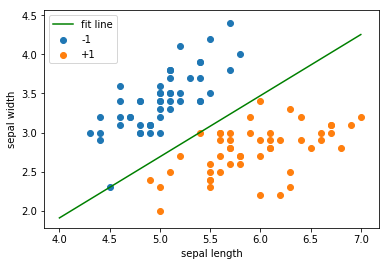

In [20]:
x0s = np.array([4.0, 7.0])
x1s = -(ws[0] * x0s + b) / ws[1]
plt.plot(x0s, x1s, label='fit line', color='green')

plt.scatter(X[:50][:,0], X[:50][:,1], label='-1')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], label='+1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()            

### 5.总结
- 感知机模型的函数表示：$f(x)=sign(w\cdot x + b)$
- 损失函数为误分类样本到分离超平面的距离之和：$L(w,b)=-\sum_{x_{i}\in M} y_{i}(w\cdot x_{i}+b)$
- 使用随机梯度下降来优化损失函数
- 当训练集是线性可分时，感知机算法是一定可以找到将训练集完全正确分离的超平面的
- 当训练集是线性可分时，感知机算法存在无穷多个解，这些解由于不同的初值选择或不同的迭代顺序而不同

### 参考
1. 《统计学习方法》 李航  
2. [《统计学习方法》笔记-基于Python算法实现](https://github.com/wzyonggege/statistical-learning-method)